### Import libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Import  and inspect data

In [123]:
df_raw = pd.read_csv('../data/raw/data_raw.csv')
pd.set_option('display.max_columns', None)
df_raw.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [124]:
df_raw.tail()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,23:18:31,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,fffe43004900440033003600340034003200,Verlene Beaulieu,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Mobile_Data,01:39:52,15,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


In [125]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [126]:
df_raw.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [127]:
df_raw.nunique()

customer_id                     36992
Name                            36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64

In [128]:
df_raw.isna()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36988,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36989,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
df_raw.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [130]:
df_raw['last_visit_time']

0        16:08:02
1        12:38:13
2        22:53:21
3        15:57:50
4        15:46:44
           ...   
36987    04:14:05
36988    23:18:31
36989    03:50:25
36990    09:50:03
36991    01:39:52
Name: last_visit_time, Length: 36992, dtype: object

In [131]:
df_raw['complaint_status'].unique()

array(['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'No Information Available'], dtype=object)

In [132]:
df_raw['feedback'].unique()

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Product Quality',
       'Poor Customer Service', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [133]:
df_raw['feedback'].value_counts(ascending=False)

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [134]:
mask = df_raw['avg_frequency_login_days'] == 'Error'
np.sum(mask.astype(int))
# np.sum(int(mask))

np.int64(3522)

In [135]:
# It is a really interesting data but it has a lot of missing values
print(df_raw.loc[~mask,'avg_frequency_login_days'].astype(float).mean())
print(df_raw.loc[~mask,'avg_frequency_login_days'].astype(float).std())
print(df_raw.loc[~mask,'avg_frequency_login_days'].astype(float).mode())
print(df_raw.loc[~mask,'avg_frequency_login_days'].astype(float).median())
df_raw[mask].head()


15.976715237406287
9.215857569142457
0    13.0
Name: avg_frequency_login_days, dtype: float64
16.0


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
39,fffe43004900440034003100390036003500,Desire Rieder,49,F,M9F3TE2,Village,Platinum Membership,2017-06-09,Yes,CID18445,Credit/Debit Card Offers,Both,Fiber_Optic,23:11:17,8,706.36,19062.25,Error,780.58,Yes,No,No,Not Applicable,Poor Product Quality,3
44,fffe4300490044003900300031003500,Pam Seigler,36,M,C7QZITU,Village,Silver Membership,2016-11-28,Yes,CID33962,Gift Vouchers/Coupons,?,Mobile_Data,06:06:05,2,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified,4
45,fffe43004900440033003000360031003100,Lore Yarber,12,M,B1XF70C,City,Premium Membership,2017-02-13,No,xxxxxxxx,Without Offers,Desktop,Mobile_Data,22:27:40,8,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website,1
48,fffe43004900440032003800320037003300,Glendora Borel,30,M,TER02YR,City,Platinum Membership,2015-12-11,?,CID4129,Gift Vouchers/Coupons,Smartphone,Wi-Fi,14:13:01,20,100.42,86433.91,Error,719.93,No,Yes,Yes,Unsolved,Reasonable Price,2
50,fffe43004900440031003700370031003300,Luisa Allinder,23,M,UAAYTIM,Village,Gold Membership,2015-10-22,Yes,CID24995,Without Offers,?,Wi-Fi,14:01:02,10,65.25,5136.08,Error,755.22,No,Yes,No,Not Applicable,Poor Customer Service,-1


In [136]:
# The big number of "Error" values in "avg_frequency_login_days" indicates is not a mistake but a decision
# This might be because the user has not registered enough time to make an average - this information may be important

### Define strategy (at first look):
- Customer_id -> drop
- Name -> drop
- age -> Either leave as it is or create bins
- gender -> ordinal encoder
- Security_no -> drop
- region_category -> onehot encoder
- membership_category -> ordinal_encoder
- joining_date -> 3 categories: last month, last year, 1+ year
- joined_through_referral -> ordinal
- referral_id -> drop
- preferred_offer_types -> drop
- medium_of_operation -> drop
- internet_option -> drop
- last_visit_time -> drop
- days_since_last_login -> keep, maybe bin
- avg_time_spent -> keep, maybe bin
- avg_transaction_value -> keep
- avg_frequency_login_days -> keep
- points_in_wallet -> keep
- used_special_discount -> ordinal
- offer_application_preference -> ordinal
- past_complaint -> ordinal
- complaint_status -> ordinal
- feedback -> OneHot 

- churn_risk_score -> target

- CREATE: diff_avg_login_freq_last_login_days = avg_frequency_login_days - days_since_last_login

### Strategy for missing values:
- region_category: add category unknow_region
- preferred_offer_types: already dropped
- points_in_wallet: zero
- avg_frequency_login_days: input: (outlier or mean), CREATE new column: is_missing_avg_frequency_login_days
- joined_through_referral: subsitute '?' by 'No'

### Implement the strategy

#### New columns

In [137]:
# First we drop the values in which we are not interested
df_raw.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [138]:
df = df_raw[['age', 'gender',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score']]

In [139]:
# Add new columns
mask = df['avg_frequency_login_days'] == 'Error'
df['is_missing_avg_frequency_login_days'] = mask.astype(int)
df.loc[mask,'avg_frequency_login_days'] = 999 # Be careful beacuse in 'days_since_last_login', missing data are casted as -999, we do not want the substraction to cancel out and give 0, that is why +999

df['diff_avg_login_freq_last_login_days'] = df['avg_frequency_login_days'].astype(float) - df['days_since_last_login'].astype(float)
df['diff_avg_login_freq_last_login_days'].isna().sum()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_3676\1406443574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_missing_avg_frequency_login_days'] = mask.astype(int)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_3676\1406443574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_avg_login_freq_last_login_days'] = df['avg_frequency_login_days'].astype(float) - df['days_since_last_login'].astype(float)


np.int64(0)

In [140]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days
0,18,F,Village,Platinum Membership,2017-08-17,No,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,0,0.0
1,32,F,City,Premium Membership,2017-08-28,?,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,0,-6.0
2,44,F,Town,No Membership,2016-11-11,Yes,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,0,8.0
3,37,M,City,No Membership,2016-10-29,Yes,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,0,-5.0
4,31,F,City,No Membership,2017-09-12,No,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,0,-4.0


#### Handle missing values

In [141]:
variable = 'churn_risk_score'
print(df[variable].value_counts())
print(df[variable].isna().sum())

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64
0


In [142]:
mask = df['churn_risk_score'] < 0
print(mask.astype(int).sum())
df[mask].head()

1163


,age,gender,region_category,membership_category,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days
23,48,M,Town,Basic Membership,2017-11-10,Yes,12,72.52,15860.41,3.2073857931601104,529.03000,No,Yes,No,Not Applicable,No reason specified,-1,0,-8.792614
50,23,M,Village,Gold Membership,2015-10-22,Yes,10,65.25,5136.08,999,755.22000,No,Yes,No,Not Applicable,Poor Customer Service,-1,1,989.000000
62,40,M,Town,Premium Membership,2017-01-31,?,3,33.82,39735.58,25.0,784.32000,Yes,No,Yes,No Information Available,Too many ads,-1,0,22.000000
63,18,F,City,Basic Membership,2016-06-17,Yes,20,156.06,4783.23,28.75639925305587,597.87000,Yes,No,Yes,No Information Available,Too many ads,-1,0,8.756399
85,55,M,City,Platinum Membership,2015-04-14,Yes,1,1316.52,2367.56,25.0,441.83655,Yes,No,No,Not Applicable,No reason specified,-1,0,24.000000


In [143]:
# Impute missing or not manegable data
df.loc[(df['gender'] == 'Unknown'), 'gender'] = 'M' # We assign the unknown values as men
df.loc[(df['region_category'].isna()), 'region_category'] = 'Unknown'
df.loc[(df['joined_through_referral']=='?'), 'region_category'] = 'No'
df.loc[(df['avg_frequency_login_days'].astype(float) < 0), 'avg_frequency_login_days'] =  - df['avg_frequency_login_days'].astype(float)
df.loc[(df['points_in_wallet'].astype(float) < 0), 'points_in_wallet'] =  - df['points_in_wallet'].astype(float)
df.loc[(df['points_in_wallet'].isna()), 'points_in_wallet'] = 0

# Seeing the relation between negative feedback and -1 in churn_risk_score it seems the -1 indicates the client has probably already left

#### Extra changes

In [144]:
# Substitute 'joining_date' for days until today
df['joining_date'] = pd.to_datetime(df['joining_date'])
df['days_since_joining'] = (df['joining_date'].max() - df['joining_date']).dt.days
df_clean = df.drop('joining_date', axis=1)
df = df_clean.copy()
df_clean.head()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_3676\177487820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joining_date'] = pd.to_datetime(df['joining_date'])
C:\Users\Pablo\AppData\Local\Temp\ipykernel_3676\177487820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_joining'] = (df['joining_date'].max() - df['joining_date']).dt.days


,age,gender,region_category,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining
0,18,F,Village,Platinum Membership,No,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,0,0.0,136
1,32,F,No,Premium Membership,?,16,306.34,12838.38,10.0,0.00,Yes,No,Yes,Solved,Quality Customer Care,1,0,-6.0,125
2,44,F,Town,No Membership,Yes,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,0,8.0,415
3,37,M,City,No Membership,Yes,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,0,-5.0,428
4,31,F,City,No Membership,No,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,0,-4.0,110


### Transform categorical columns

In [145]:
print(df.columns)
print(df.info())
df.head()

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'is_missing_avg_frequency_login_days',
       'diff_avg_login_freq_last_login_days', 'days_since_joining'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  36992 non-null  int64  
 1   gender                               36992 non-null  object 
 2   region_category                      36992 non-null  object 
 3   membership_category                  36992 non-null  ob

,age,gender,region_category,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining
0,18,F,Village,Platinum Membership,No,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,0,0.0,136
1,32,F,No,Premium Membership,?,16,306.34,12838.38,10.0,0.00,Yes,No,Yes,Solved,Quality Customer Care,1,0,-6.0,125
2,44,F,Town,No Membership,Yes,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,0,8.0,415
3,37,M,City,No Membership,Yes,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,0,-5.0,428
4,31,F,City,No Membership,No,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,0,-4.0,110


In [146]:
categorical_columns = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'used_special_discount',
                       'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

In [147]:
df['joined_through_referral'].value_counts(ascending=False)

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [148]:
# Gender
dict_gender = {'M': 1, 'F':0}
df['is_male'] = df['gender'].map(dict_gender)
df = df.drop(['gender'], axis=1).copy() # Lo ponemos despues

In [149]:
# Region
region_dict = {'No': 'Missing', 'Unknown': 'Missing'}
df['region_category'] = df['region_category'].replace(region_dict)
df = pd.get_dummies(df, columns=['region_category'], prefix='region', dtype=int).copy()

In [150]:
# Membership
# We dont know in which position does Premium go. Under Silver? Over Gold? Let´s explore benefit and other columns info
# We have two options, use a ordinal encoder and vary different positions or use One-Hot
# We will try different ordering with a Random Forest and whatever gives better validation results, will stay
dict_membership1 = {"No Membership": 0, "Basic Membership": 1, "Silver Membership": 2, "Gold Membership": 3, "Premium Membership": 4, "Platinum Membership": 5}
dict_membership2 = {"No Membership": 0, "Basic Membership": 1, "Premium Membership": 2,"Silver Membership": 3, "Gold Membership": 4,  "Platinum Membership": 5}
dict_membership3 = {"No Membership": 0, "Basic Membership": 1,"Silver Membership": 2, "Gold Membership": 3,  "Platinum Membership": 4, "Premium Membership": 5}
# We make the changes at the end of this section to avoid repetition

In [151]:
# Referral
dict_referral = {'No': 0, '?': 0, 'Yes': 1}
df['joined_through_referral'] = df['joined_through_referral'].map(dict_referral)

In [152]:
# Discount
dict_discounts = {'No': 0, 'Yes': 1}
df['used_special_discount'] = df['used_special_discount'].map(dict_discounts)

In [153]:
# Offer
df['offer_application_preference'].value_counts()
dict_offer = {'No': 0, 'Yes': 1}
df['offer_application_preference'] = df['offer_application_preference'].map(dict_offer)

In [154]:
# Past complaint
df['past_complaint'].value_counts()
dict_complaint = {'No': 0, 'Yes': 1}
df['past_complaint'] = df['past_complaint'].map(dict_complaint)

In [155]:
# Complaint status
df['complaint_status'].value_counts()
# There is some kind of order, but it is not really clear. We can apply One-Hot Encoder
df = pd.get_dummies(df, columns=['complaint_status'], dtype=int)

In [156]:
df['feedback'].value_counts()
# We can use One-Hot and also group by positive, negative and neutral feeling. This can help the model understand which are positive
# and which are negative. But also understand if some reasons have more weight than others
dict_feedback_category = {"No reason specified": "Neutral", 
                          "Poor Product Quality": "Negative", "Too many ads": "Negative", "Poor Website": "Negative", "Poor Customer Service": "Negative", 
                          "Reasonable Price": "Positive", "User Friendly Website": "Positive", "Products always in Stock": "Positive", "Quality Customer Care": "Positive"}
df['feedback_categroy'] = df['feedback'].map(dict_feedback_category)
df = pd.get_dummies(df, columns=['feedback', 'feedback_categroy'], dtype=int)

In [157]:
df.head()

,age,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining,is_male,region_City,region_Missing,region_Town,region_Village,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,feedback_categroy_Negative,feedback_categroy_Neutral,feedback_categroy_Positive
0,18,Platinum Membership,0,17,300.63,53005.25,17.0,781.75,1,1,0,2,0,0.0,136,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,32,Premium Membership,0,16,306.34,12838.38,10.0,0.00,1,0,1,1,0,-6.0,125,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,44,No Membership,1,14,516.16,21027.00,22.0,500.69,0,1,1,5,0,8.0,415,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,37,No Membership,1,11,53.27,25239.56,6.0,567.66,0,1,1,5,0,-5.0,428,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,31,No Membership,0,20,113.13,24483.66,16.0,663.06,0,1,1,5,0,-4.0,110,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        36992 non-null  int64  
 1   membership_category                        36992 non-null  object 
 2   joined_through_referral                    36992 non-null  int64  
 3   days_since_last_login                      36992 non-null  int64  
 4   avg_time_spent                             36992 non-null  float64
 5   avg_transaction_value                      36992 non-null  float64
 6   avg_frequency_login_days                   36992 non-null  object 
 7   points_in_wallet                           36992 non-null  float64
 8   used_special_discount                      36992 non-null  int64  
 9   offer_application_preference               36992 non-null  int64  
 10  past_complaint        

In [159]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)

### Train-test-val split before normalizing data

In [160]:
df.shape

(36992, 37)

In [161]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['churn_risk_score'])
y = df['churn_risk_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [162]:
X_train.head()

,age,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining,is_male,region_City,region_Missing,region_Town,region_Village,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,feedback_categroy_Negative,feedback_categroy_Neutral,feedback_categroy_Positive
6020,12,Basic Membership,1,15,498.100000,32246.32,10.0,682.650000,0,1,0,0,-5.0,697,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9156,55,Silver Membership,0,18,80.760000,8815.31,13.0,661.420000,1,0,1,0,-5.0,194,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
36885,21,Basic Membership,0,14,189.210000,45366.55,27.0,500.400000,1,0,1,0,13.0,115,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3010,33,Platinum Membership,1,10,-283.509478,1342.94,20.0,465.040109,1,1,0,0,10.0,994,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
30927,38,Silver Membership,1,7,82.940000,14818.45,999.0,703.520000,0,1,1,1,992.0,485,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Normalize numerical columns

In [163]:
# plt.hist(df['age'], bins=40);

In [164]:
# df['age'].value_counts(ascending=False) # Se podria hacer bineado, pero dado que hay suficientes datos de cada tipo, no es necesario

In [165]:
print(df.columns)
print(df.info())
df.head()

Index(['age', 'membership_category', 'joined_through_referral',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'churn_risk_score',
       'is_missing_avg_frequency_login_days',
       'diff_avg_login_freq_last_login_days', 'days_since_joining', 'is_male',
       'region_City', 'region_Missing', 'region_Town', 'region_Village',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'feedback_No reason specified', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly W

,age,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining,is_male,region_City,region_Missing,region_Town,region_Village,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,feedback_categroy_Negative,feedback_categroy_Neutral,feedback_categroy_Positive
0,18,Platinum Membership,0,17,300.63,53005.25,17.0,781.75,1,1,0,2,0,0.0,136,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,32,Premium Membership,0,16,306.34,12838.38,10.0,0.00,1,0,1,1,0,-6.0,125,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,44,No Membership,1,14,516.16,21027.00,22.0,500.69,0,1,1,5,0,8.0,415,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,37,No Membership,1,11,53.27,25239.56,6.0,567.66,0,1,1,5,0,-5.0,428,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,31,No Membership,0,20,113.13,24483.66,16.0,663.06,0,1,1,5,0,-4.0,110,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [166]:
numerical_columns = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 
                     'points_in_wallet', 'diff_avg_login_freq_last_login_days', 'days_since_joining']

In [167]:
my_column_transformer = ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(), numerical_columns)
])

my_column_transformer.fit(X_train)
X_train[numerical_columns] = my_column_transformer.transform(X_train)
X_test[numerical_columns] = my_column_transformer.transform(X_test)

In [168]:
X_train.head()

,age,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining,is_male,region_City,region_Missing,region_Town,region_Village,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,feedback_categroy_Negative,feedback_categroy_Neutral,feedback_categroy_Positive
6020,0.037037,Basic Membership,1,0.989268,0.503794,0.317271,0.010004,0.329931,0,1,0,0,0.025217,0.636530,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9156,0.833333,Silver Membership,0,0.992195,0.428145,0.080865,0.013007,0.319670,1,0,1,0,0.025217,0.177169,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
36885,0.203704,Basic Membership,0,0.988293,0.447803,0.449647,0.027021,0.241848,1,0,1,0,0.033977,0.105023,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3010,0.425926,Platinum Membership,1,0.984390,0.362116,0.005473,0.020014,0.224758,1,1,0,0,0.032517,0.907763,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
30927,0.518519,Silver Membership,1,0.981463,0.428540,0.141434,1.000000,0.340018,0,1,1,1,0.510418,0.442922,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [169]:
df.shape, len(numerical_columns), X_train.shape

((36992, 37), 8, (29593, 36))

### Choose membership_category strategy

In [170]:
# We will try the 3 different proposed oreding and see which one gives as better results for a simple model

In [171]:
# Train - validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

In [172]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()
X_train3 = X_train.copy()
X_train4 = X_train.copy()

X_train1['membership_category'] = X_train1['membership_category'].map(dict_membership1)
X_train2['membership_category'] = X_train2['membership_category'].map(dict_membership2)
X_train3['membership_category'] = X_train3['membership_category'].map(dict_membership3)
X_train4 = pd.get_dummies(X_train4, ['membership_category'])

# Scale the variable
scaler = MinMaxScaler()
scaler.fit(X_train1[['membership_category']])
X_train1['membership_category'] = scaler.transform(X_train1[['membership_category']])
X_train2['membership_category'] = scaler.transform(X_train2[['membership_category']])
X_train3['membership_category'] = scaler.transform(X_train3[['membership_category']])

In [173]:
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()
model3 = RandomForestClassifier()
model4 = RandomForestClassifier()

model12 = LogisticRegression()
model22 = LogisticRegression()
model32 = LogisticRegression()
model42 = LogisticRegression()

models = [model1, model2, model3, model4, model12, model22, model32, model42]
X_train_list = [X_train1, X_train2, X_train3, X_train4, X_train1, X_train2, X_train3, X_train4]

In [174]:
X_train.describe()

,age,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,is_missing_avg_frequency_login_days,diff_avg_login_freq_last_login_days,days_since_joining,is_male,region_City,region_Missing,region_Town,region_Village,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,feedback_categroy_Negative,feedback_categroy_Neutral,feedback_categroy_Positive
count,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000,22194.000000
mean,0.500875,0.427368,0.932747,0.458052,0.287025,0.109892,0.301967,0.547220,0.554699,0.495720,0.095026,0.101776,0.496768,0.496440,0.294674,0.272371,0.325313,0.107642,0.123952,0.504280,0.123997,0.124268,0.123502,0.168604,0.170497,0.170677,0.169460,0.037217,0.037217,0.037713,0.170632,0.037983,0.681265,0.168604,0.150131
std,0.293902,0.494708,0.225221,0.071747,0.195994,0.288550,0.129397,0.497776,0.497010,0.499993,0.293257,0.179061,0.290248,0.499999,0.455906,0.445190,0.468502,0.309934,0.329535,0.499993,0.329586,0.329894,0.329020,0.374410,0.376077,0.376235,0.375166,0.189298,0.189298,0.190505,0.376195,0.191160,0.465996,0.374410,0.357208
min,0.000000,0.000000,0.000000,0.000000,0.000058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240741,0.000000,0.982439,0.424439,0.134827,0.010004,0.278020,0.000000,0.000000,0.000000,0.000000,0.026190,0.245662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.986341,0.442874,0.269209,0.017011,0.328841,1.000000,1.000000,0.000000,0.000000,0.030083,0.494977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759259,1.000000,0.990244,0.478336,0.403582,0.025019,0.365818,1.000000,1.000000,1.000000,0.000000,0.034950,0.750685,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
X_train1.isnull().any().any()

np.False_

In [176]:
for i in range(len(models)):
    models[i].fit(X_train_list[i], y_train)
    print(f"model {i} trained")

model 0 trained
model 1 trained
model 2 trained
model 3 trained


c:\Users\Pablo\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model 4 trained


c:\Users\Pablo\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model 5 trained


c:\Users\Pablo\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model 6 trained
model 7 trained


c:\Users\Pablo\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
# Copy
X_val1 = X_val.copy()
X_val2 = X_val.copy()
X_val3 = X_val.copy()
X_val4 = X_val.copy()

# Map
X_val1['membership_category'] = X_val1['membership_category'].map(dict_membership1)
X_val2['membership_category'] = X_val2['membership_category'].map(dict_membership2)
X_val3['membership_category'] = X_val3['membership_category'].map(dict_membership3)
X_val4 = pd.get_dummies(X_val4, ['membership_category'])

# Scaler
scaler = MinMaxScaler()
scaler.fit(X_train1[['membership_category']])
X_val1['membership_category'] = scaler.transform(X_val1[['membership_category']])
X_val2['membership_category'] = scaler.transform(X_val2[['membership_category']])
X_val3['membership_category'] = scaler.transform(X_val3[['membership_category']])

In [178]:
# Evaluate 
X_val_list = [X_val1, X_val2, X_val3, X_val4, X_val1, X_val2, X_val3, X_val4]
from sklearn.metrics import accuracy_score, confusion_matrix
for i in range(len(models)):
    y_pred = models[i].predict(X_val_list[i])
    print(f"Model {i+1}, accuracy: {accuracy_score(y_pred=y_pred, y_true=y_val)}")
    print(confusion_matrix(y_true=y_val, y_pred=y_pred))


Model 1, accuracy: 0.5229085011488039
[[   0   12   11  158   12   40]
 [   0  438   93    0    0    0]
 [   0  202  346    0    0    0]
 [   0    0    0 2085    0    0]
 [   0    0    0 1538  159  340]
 [   0    0    0  997  127  841]]
Model 2, accuracy: 0.5694012704419517
[[   0   12   11  137   35   38]
 [   0  424  107    0    0    0]
 [   0  189  359    0    0    0]
 [   0    0    0 2084    1    0]
 [   0    0    0 1195  503  339]
 [   0    0    0  872  250  843]]
Model 3, accuracy: 0.5257467225300716
[[   0   12   11  158   10   42]
 [   0  444   87    0    0    0]
 [   0  208  340    0    0    0]
 [   0    0    0 2085    0    0]
 [   0    0    0 1537  171  329]
 [   0    0    0  997  118  850]]
Model 4, accuracy: 0.7552371942154346
[[   0   12   11   70   53   87]
 [   0  440   91    0    0    0]
 [   0  153  395    0    0    0]
 [   0    0    0 1931  154    0]
 [   0    0    0  224 1125  688]
 [   0    0    0    0  268 1697]]
Model 5, accuracy: 0.41262332747668606
[[   0    1  

In [179]:
y_train.value_counts()

churn_risk_score
 3    6254
 4    6111
 5    5896
 2    1645
 1    1591
-1     697
Name: count, dtype: int64

In [180]:
# It seems the best accuracy is given by yhe one-hot encoder

In [181]:
X_train = pd.get_dummies(X_train, ['membership_category'])
X_val = pd.get_dummies(X_val, ['membership_category'])
X_test = pd.get_dummies(X_test, ['membership_category'])

### Save the processed data

In [182]:
X_train.to_csv('../data/processed/X_train.csv')
X_val.to_csv('../data/processed/X_val.csv')
X_test.to_csv('../data/processed/X_test.csv')

y_train.to_csv('../data/processed/y_train.csv')
y_val.to_csv('../data/processed/y_val.csv')
y_test.to_csv('../data/processed/y_test.csv')

In [183]:
y_train.value_counts()

churn_risk_score
 3    6254
 4    6111
 5    5896
 2    1645
 1    1591
-1     697
Name: count, dtype: int64

<Axes: >

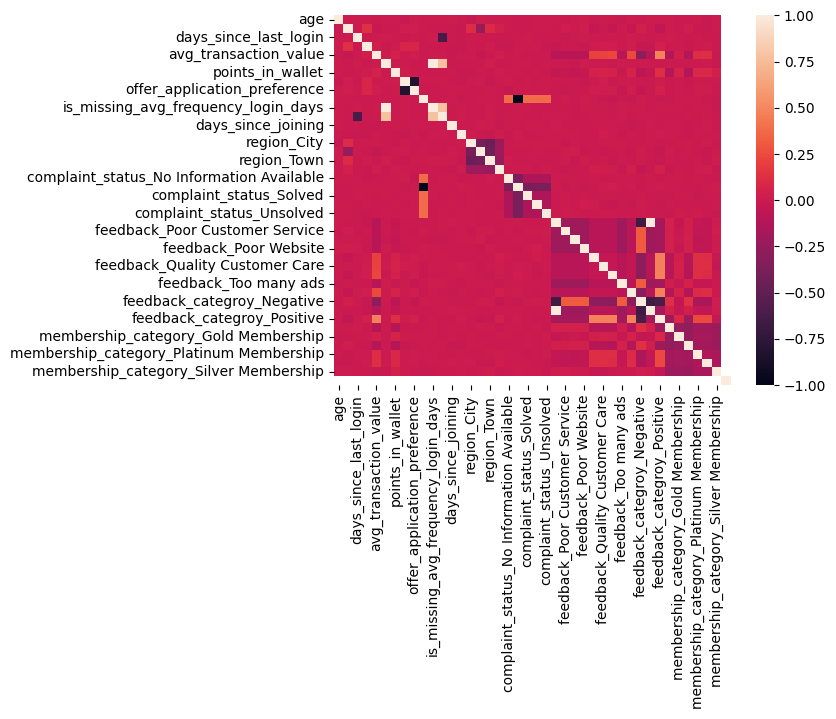

In [184]:
df_corr = pd.concat([X_train, y_train])
corr = df_corr.corr()
sns.heatmap(corr)

In [185]:
# Optional: In the next notebook we will train different models. If accuracy is low, we can group by: No risk[-1,-1], Low risk[2,3], High risk[4, 5]